In [1]:
#Author: Timothy Araujo (EID: tda739)
#Date: 10/4/2023

import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.linalg import 
import warnings
class SpectralDecompositionPowerMethod:
    def __init__(self, 
    max_iter=1000, 
    tolerance=1e-5, 
    gamma=0.0,
    random_state=3, 
    store_intermediate_results=False
    ):
        
    
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.gamma = gamma
        self.random_state = random_state
        self.store_intermediate_results = store_intermediate_results
        self.stored_eigenvalues = None
        self.stored_eigenvectors = None
        
    def fit(self, A):
            
        """
        Perform the power method with random initialization, and optionally store
        intermediate estimates of the eigenvalue and eigenvectors at each iteration.
        You can add an early stopping criterion based on the tolerance parameter.
        """
        np.random.seed(self.random_state)
        n = np.shape(A)[1]   
        v = random.rand(n)
        v = v/norm(v, 1)
        self.stored_eigenvalues = []
        self.stored_eigenvectors = []
        for i in range(self.max_iter):
            vref = np.copy(v)
            v = self.gamma*v+(1-self.gamma)*A@v/norm(A@v,1)
            eigen = norm(A@v,1)
            v = v/eigen
            if self.store_intermediate_results:
                self.stored_eigenvectors.append(vref)
                self.stored_eigenvalues.append(eigen)
            if np.mean(np.sqrt((v - vref)**2/vref**2)) <= self.tolerance:
                break
        if self.store_intermediate_results:
            self.stored_eigenvalues = np.array(self.stored_eigenvalues)
            self.stored_eigenvectors = np.array(self.stored_eigenvectors)
        self.vector = v
        self.values = eigen
        
    
                

14.616615037848032
Power method solution: 2.6716870587774992
Numpy solution: 1.630214681160556


Text(0, 0.5, 'Power method eigenvector')

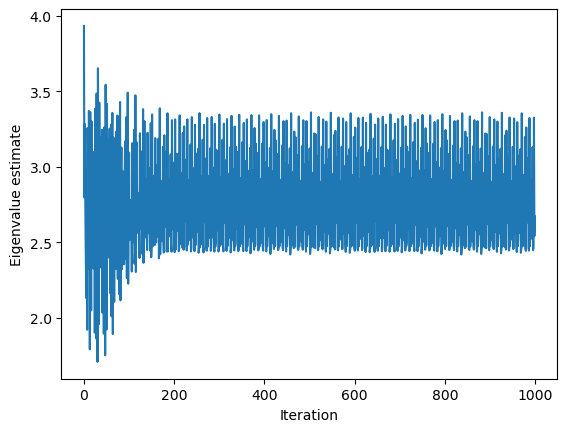

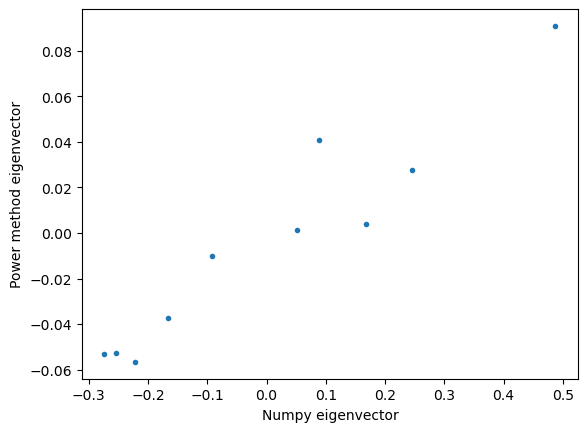

In [45]:
def eigmax_numpy(A):
    """
    Compute the maximum eigenvalue and associated eigenvector in a matrix with Numpy.
    """
    eigsys = np.linalg.eig(A)
    ind = np.abs(eigsys[0]).argmax()
    return np.real(eigsys[0][ind]), np.real(eigsys[1][:, ind])


# np.random.seed(2) # for reproducibility
mm = np.random.random(size=(10, 10)) / 100
mm = np.random.normal(size=(10, 10))# / 100 # these matrices fail to converge more often

print(np.linalg.cond(mm.T))
model = SpectralDecompositionPowerMethod(store_intermediate_results=True)
model.fit(mm);


print(f"Power method solution: {model.values}")
print(f"Numpy solution: {eigmax_numpy(mm)[0]}")

plt.figure()
plt.plot(model.stored_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")

plt.figure()
plt.plot(eigmax_numpy(mm)[1], model.vector, '.')
plt.xlabel("Numpy eigenvector")
plt.ylabel("Power method eigenvector")

In [78]:
Re = 1200 # Reynolds number, change this to 300, 600, 900, 1200

# Load the two-dimensional velocity field data. Data is stored in a 4D numpy array,
# where the first dimension is the time index, the second and third dimensions are the
# x and y coordinates, and the fourth dimension is the velocity components (ux or uv).
vfield = np.load(
    f"/Users/timothyaraujo/Python/work/test_repo/vortex_street_velocities_Re_{Re}_largefile.npz", 
    allow_pickle=True
)
print("Velocity field data has shape: {}".format(vfield.shape))

# Calculate the vorticity, which is the curl of the velocity field
## Missing minus sign??
vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0]

Velocity field data has shape: (3000, 256, 128, 2)


In [79]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
from numpy import linalg as LA
def plotter(i):
    # plt.close()
    fig = plt.figure(figsize=(10, 10))
    vscale = np.percentile(np.abs(vort_field[i]), 98)
    plt.imshow(
        vort_field[i],
        vmin=-vscale, vmax=vscale, cmap="RdBu"
    )
    plt.show()
interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(vort_field) - 1, 1, layout=Layout(width='500px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='500px'), max=2999), Output()), …

<function __main__.plotter(i)>

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin

# We are going to use class inheritance to define our object. The two base classes from
# scikit-learn represent placeholder objects for working with datasets. They include 
# many generic methods, like fetching parameters, getting the data shape, etc.
# 
# By inheriting from these classes, we ensure that our object will have access to these
# functions, even though we don't have to define them ourselves
class PrincipalComponents(BaseEstimator, TransformerMixin):
    """
    A class for performing principal component analysis on a dataset.

    Parameters
        random_state (int): random seed for reproducibility
        components_ (numpy array): the principal components
        singular_values_ (numpy array): the singular values
    """

    def __init__(self, random_state=None):
        self.random_state = random_state
        self.components_ = None
        self.singular_values_ = None

    def fit(self, X):
        """
        Fit the PCA model to the data X. Store the eigenvectors in the attribute
        self.components_ and the eigenvalues in the attribute self.singular_values_

        NOTE: This method needs to return self in order to work properly with the
         scikit-learn base classes from which it inherits.

        Args:
            X (np.ndarray): A 2D array of shape (n_samples, n_features) containing the
                data to be fit.
        
        Returns:
            self (PrincipalComponents): The fitted object.
        """
       
        Xarr = np.array(X)
        ndata = np.shape(Xarr)[0]
        Xbar = np.mean(Xarr,0)
        Xcenter = Xarr - Xbar
        covmat = Xcenter.T@Xcenter/ndata
        eigval,eigvec = LA.eigh(covmat)
        indexsorted = np.argsort(eigval)[::-1]
        eigvec = np.transpose(eigvec)[indexsorted]
        eigval=eigval[indexsorted]
        self.components_ = eigvec
        self.singular_values_ = eigval
        
        return self
    
    
    def transform(self, X):
        """
        Transform the data X into the new basis using the PCA components.

        Args:
            X (np.ndarray): A 2D array of shape (n_samples, n_features) containing the
                data to be transformed.

        Returns:
            X_new (np.ndarray): A 2D array of shape (n_samples, n_components) containing
                the transformed data. n_components <= n_features, depending on whether
                we truncated the eigensystem.
        """
        
        Xarr = np.array(X)
        return Xarr @ self.components_.T


Text(0, 0.5, 'Eigenvalue rank')

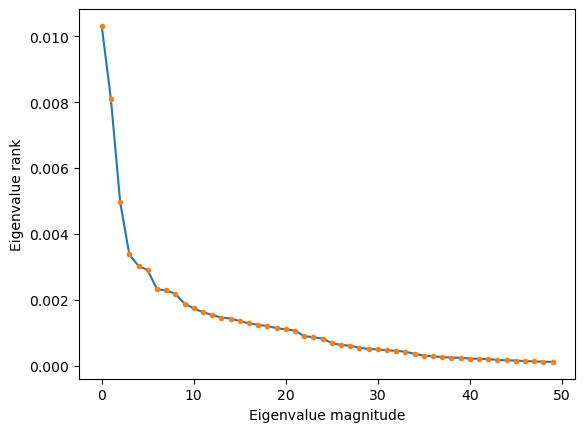

In [81]:
data = np.copy(vort_field)[::3, ::2, ::2] # subsample data to reduce compute load
data_reshaped = np.reshape(data, (data.shape[0], -1))

model = PrincipalComponents()
# model = PCA()

data_transformed = model.fit_transform(data_reshaped)
principal_components = np.reshape(
    model.components_, (model.components_.shape[0], data.shape[1], data.shape[2])
)

## Look at skree plot, and identify the "elbow" indicating low dimensionality
plt.figure()
plt.plot(model.singular_values_[:50])
plt.plot(model.singular_values_[:50], '.')
plt.xlabel("Eigenvalue magnitude")
plt.ylabel("Eigenvalue rank")



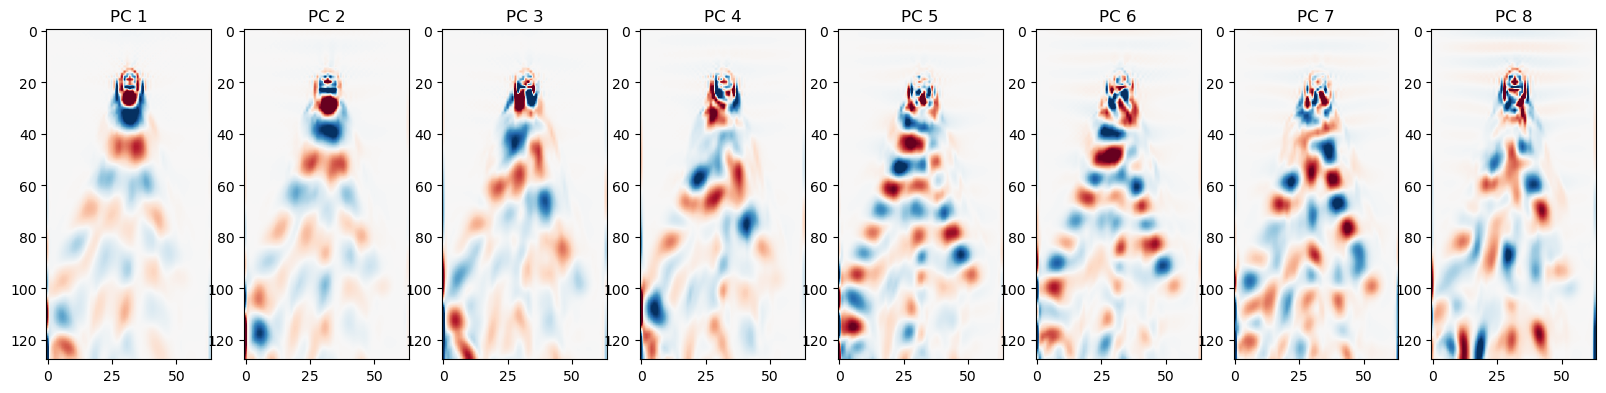

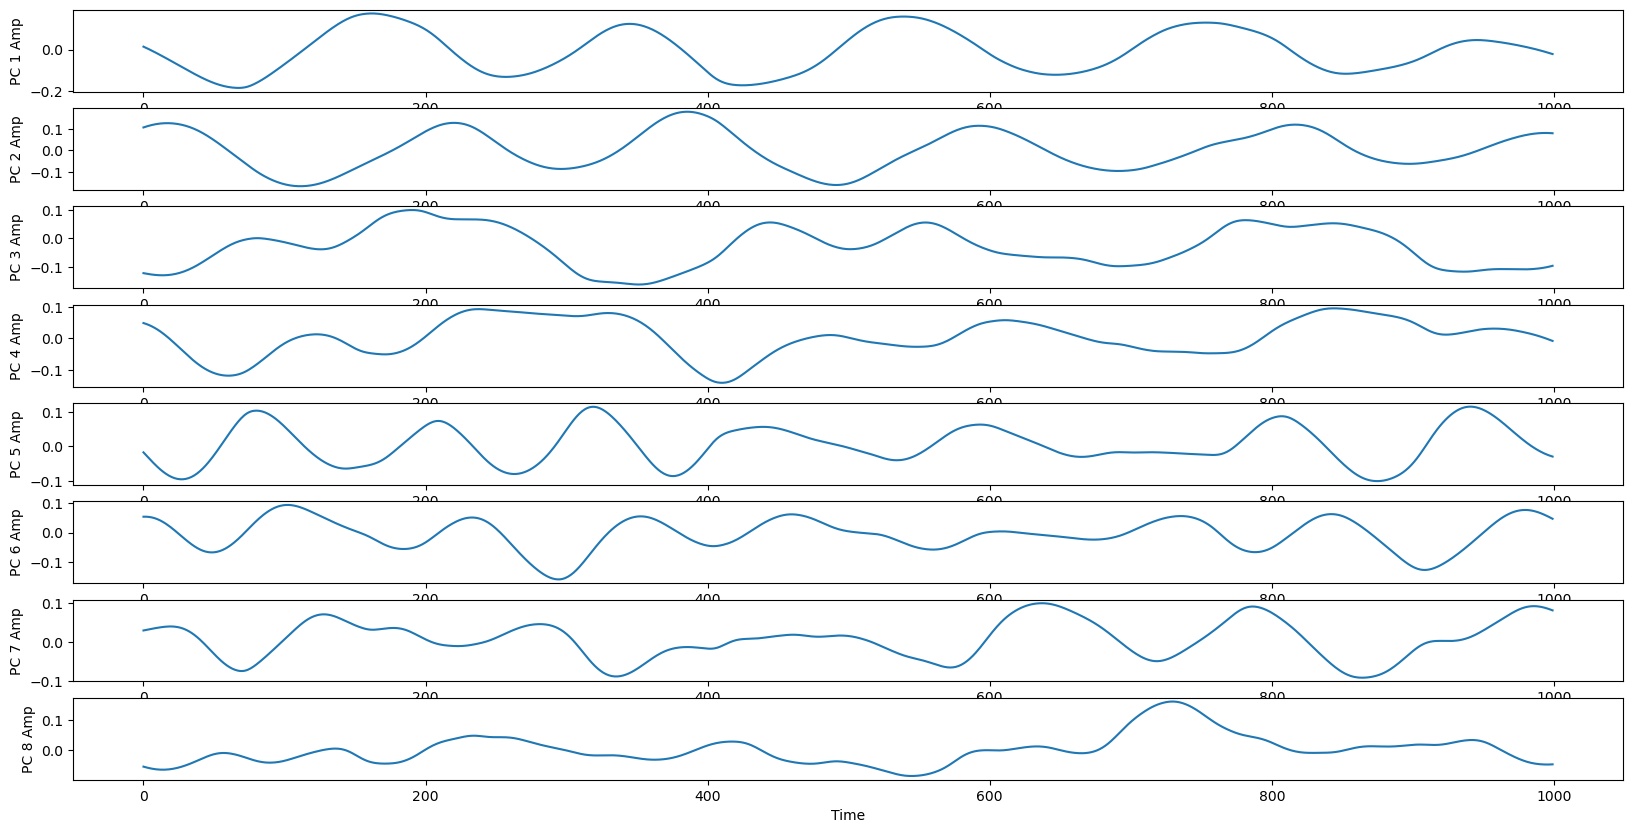

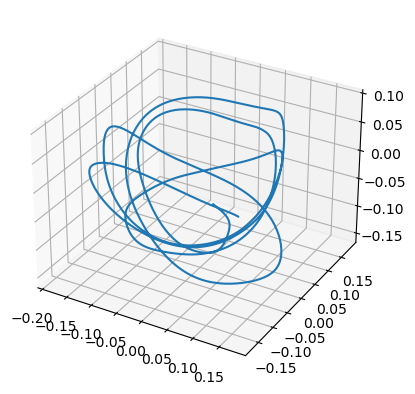

In [82]:
plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(1, 8, i+1)
    vscale = np.percentile(np.abs(principal_components[i]), 99)
    plt.imshow(principal_components[i], cmap="RdBu", vmin=-vscale, vmax=vscale)
    plt.title("PC {}".format(i+1))

plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(8, 1, i+1)
    plt.plot(data_transformed[:, i])
    plt.ylabel("PC {} Amp".format(i+1))
plt.xlabel("Time")

plt.figure()
ax = plt.axes(projection='3d')
ax.plot(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2])